   # Análisis gráfico de la Temporada 2023 de Fórmula 1

Este proyecto tiene como objetivo analizar y visualizar datos clave de la temporada 2023 de la Fórmula 1, utilizando técnicas de procesamiento de datos y herramientas de análisis estadístico. A través del uso de Python y bibliotecas como Pandas, NumPy, Seaborn y Plotly, se examinan aspectos fundamentales como el calendario de carreras, el desempeño de los pilotos y equipos, y las estadísticas de clasificación y carreras.

El análisis incluye comparaciones entre circuitos, rendimiento de los equipos en las distintas pruebas, correlaciones entre la longitud de los circuitos y la cantidad de vueltas, y otros factores que influyen en los resultados de las competencias. Además, se presentan visualizaciones interactivas para facilitar la interpretación de los datos y extraer conclusiones sobre la dinámica de la temporada.

Este estudio proporciona una visión detallada del campeonato, permitiendo identificar tendencias y destacar el desempeño de los principales protagonistas del automovilismo mundial.

## URL del conjunto de datos: https://github.com/toUpperCase78/formula1-datasets

In [31]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from ipywidgets import widgets, interact

In [32]:
path = "../datos/formula1-datasets-master/"
calendario2023 = pd.read_csv(path + "/Formula1_2023season_calendar.csv", sep = ",")
equipos2023 = pd.read_csv(path + "/Formula1_2023season_teams.csv", sep = ",")
pilotos2023 = pd.read_csv(path + "/Formula1_2023season_drivers.csv", sep = ",")
resultadosCarreras_2023 = pd.read_csv(path + "/Formula1_2023season_raceResults.csv", sep = ",")
resultadosQuali_2023 = pd.read_csv(path + "/Formula1_2023season_qualifyingResults.csv", sep = ",")
resultadosSprint_2023 = pd.read_csv(path + "/Formula1_2023season_sprintResults.csv", sep = ",")
resultadosSprintQuali_2023 = pd.read_csv(path + "/Formula1_2023season_sprintShootoutResults.csv", sep = ",")

## Temporada 2023 de F1 - Calendario

In [36]:
calendario2023

,Round,Race Date,GP Name,Country,City,Circuit Name,First GP,Number of Laps,Circuit Length(km),Race Distance(km),Lap Record,Record Owner,Record Year,Turns,DRS Zones
0,1,05/03/2023,Gulf Air Bahrain GP,Bahrain,Sakhir,Bahrain International Circuit,2004,57,5.412,308.238,1:31.447,Pedro de la Rosa,2005,15,3
1,2,19/03/2023,STC Saudi Arabian GP,Saudi Arabia,Jeddah,Jeddah Corniche Circuit,2021,50,6.174,308.450,1:30.734,Lewis Hamilton,2021,27,3
2,3,02/04/2023,Rolex Australian GP,Australia,Melbourne,Melbourne Grand Prix Circuit,1996,58,5.278,306.124,1:20.235,Sergio Perez,2023,14,4
3,4,30/04/2023,Azerbaijan GP,Azerbaijan,Baku,Baku City Circuit,2016,51,6.003,306.049,1:43.009,Charles Leclerc,2019,20,2
4,5,07/05/2023,Crypto.com Miami GP,United States,Miami,Miami International Autodrome,2022,57,5.412,308.326,1:29.708,Max Verstappen,2023,19,3
5,6,NaN,Qatar Airways Gran Premio Del Made In Italy e ...,Italy,Imola,Autodromo Enzo e Dino Ferrari,1980,63,4.909,309.049,1:15.484,Lewis Hamilton,2020,19,1
6,7,28/05/2023,Grand Prix de Monaco,Monaco,Monaco,Circuit de Monaco,1950,78,3.337,260.286,1:12.909,Lewis Hamilton,2021,19,1
7,8,04/06/2023,AWS Gran Premio de España,Spain,Catalunya,Circuit de Barcelona-Catalunya,1991,66,4.657,307.236,1:16.330,Max Verstappen,2023,14,2
8,9,18/06/2023,Pirelli Grand Prix du Canada,Canada,Montréal,Circuit Gilles-Villeneuve,1978,70,4.361,305.270,1:13.078,Valtteri Bottas,2018,14,3
9,10,02/07/2023,Rolex Grosser Preis Von Österreich,Austria,Spielberg,Red Bull Ring,1970,71,4.318,306.452,1:05.619,Carlos Sainz,2020,10,3


## Longitud de circuito (km) por Gran Premio en la Temporada 2023 de F1

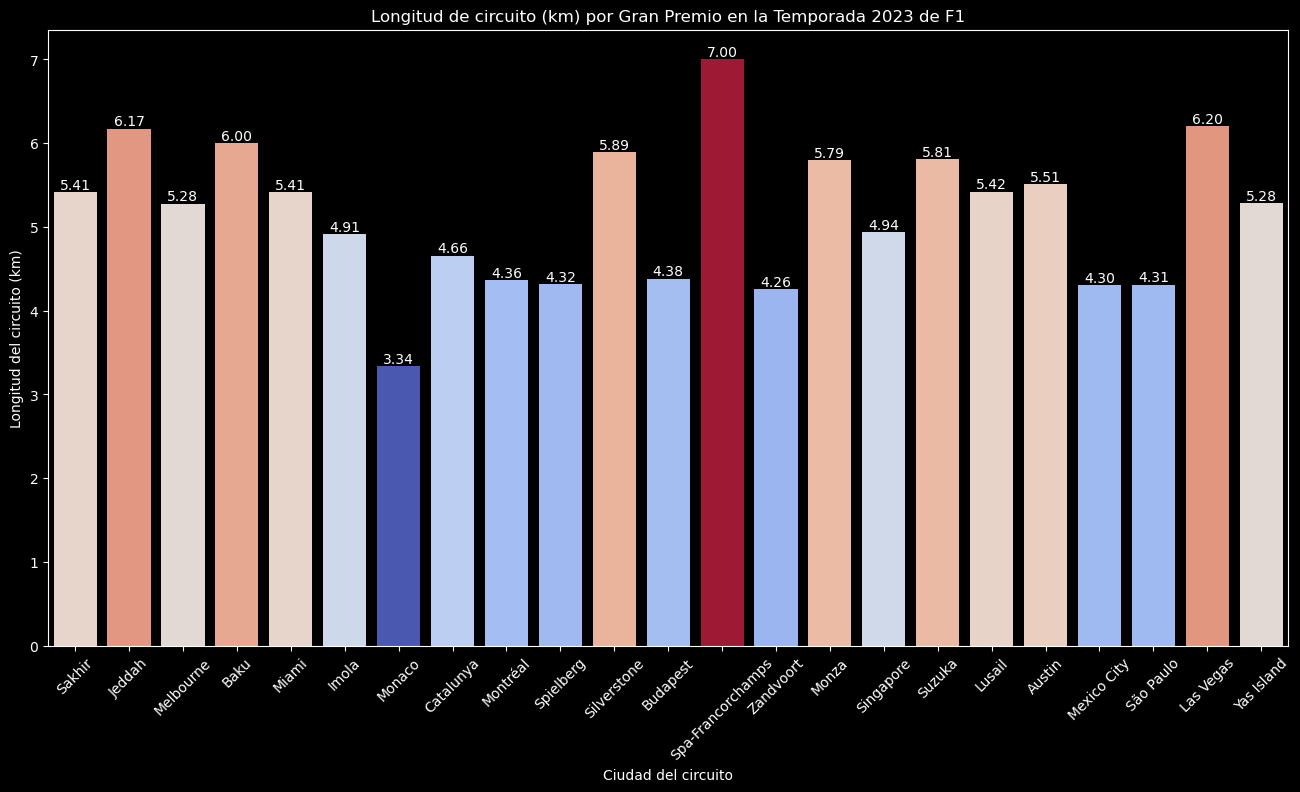

In [38]:
# Usar estilo de fondo oscuro
plt.style.use('dark_background')

# Crear el gráfico de barras
plt.figure(figsize=(16, 8))

# Usar un colormap para mapear la longitud del circuito a colores
norm = plt.Normalize(calendario2023['Circuit Length(km)'].min(), calendario2023['Circuit Length(km)'].max())
cmap = plt.get_cmap('coolwarm')


# Convertir el colormap a una lista de colores
colores = [cmap(norm(value)) for value in calendario2023['Circuit Length(km)']]

bars = sns.barplot(data=calendario2023,
            x='City',
            y='Circuit Length(km)',
            hue='City',
            palette=colores,
            legend=False,
            errorbar=None)

# Añadir etiquetas al pasar el ratón
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.2f}',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom')

# Ajustar la rotación de las etiquetas para mejor legibilidad
plt.xticks(rotation=45)

# Título y etiquetas
plt.title('Longitud de circuito (km) por Gran Premio en la Temporada 2023 de F1')
plt.xlabel('Ciudad del circuito')
plt.ylabel('Longitud del circuito (km)')

# Mostrar el gráfico
plt.show()

## Número de vueltas por Gran Premio en la Temporada 2023 de F1

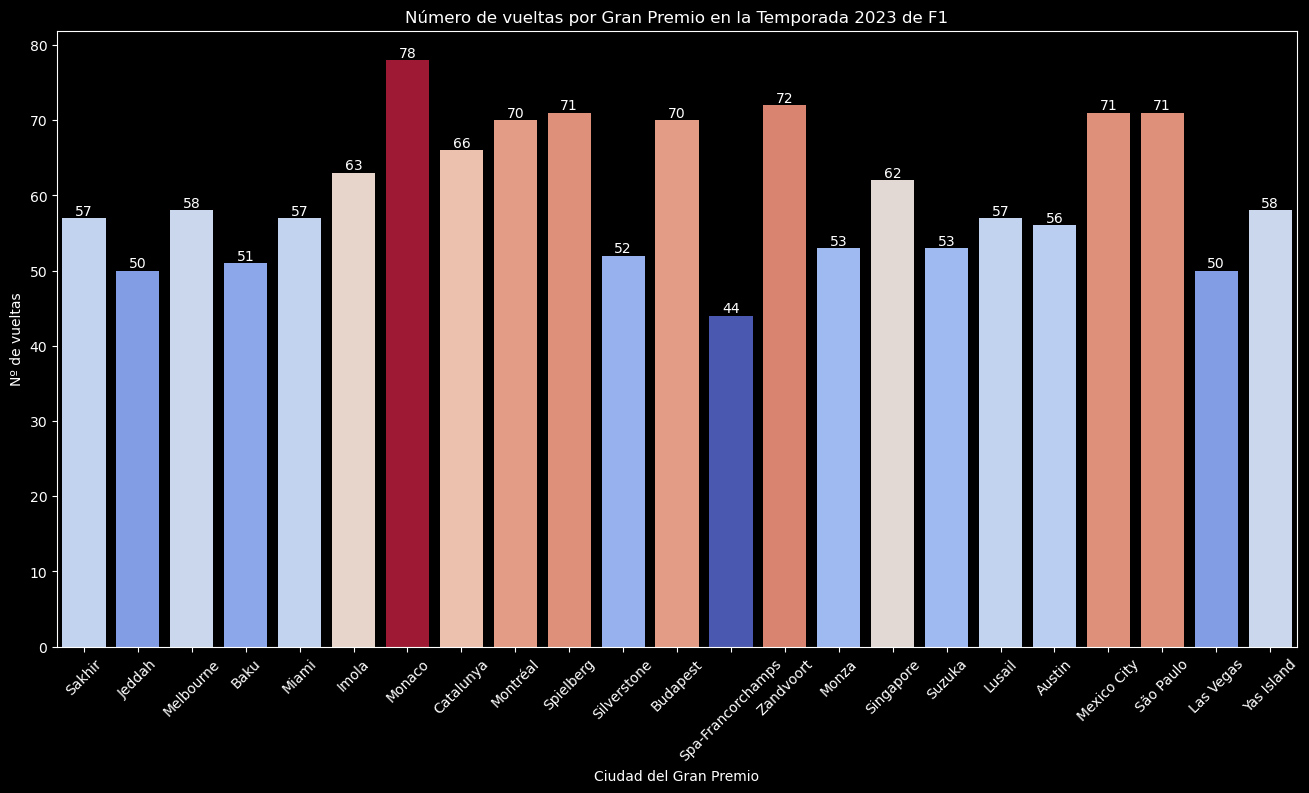

In [40]:
# Crear el gráfico de barras
plt.figure(figsize=(16, 8))

# Usar estilo de fondo oscuro
plt.style.use('dark_background')

# Usar un colormap para mapear el número de vueltas a colores
norm = plt.Normalize(calendario2023['Number of Laps'].min(), calendario2023['Number of Laps'].max())
cmap = plt.get_cmap('coolwarm')

# Convertir el colormap a una lista de colores
colores = [cmap(norm(value)) for value in calendario2023['Number of Laps']]

bars = sns.barplot(data=calendario2023,
            x='City',
            y='Number of Laps',
            hue='City',
            palette=colores,
            legend=False,
            errorbar=None)

# Añadir etiquetas al pasar el ratón, mostrando los valores como enteros
for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}',  # Convertir a entero
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom')


# Ajustar la rotación de las etiquetas para mejor legibilidad
plt.xticks(rotation=45)

# Título y etiquetas
plt.title('Número de vueltas por Gran Premio en la Temporada 2023 de F1')
plt.xlabel('Ciudad del Gran Premio')
plt.ylabel('Nº de vueltas')

# Mostrar el gráfico
plt.show()

## Correlación entre Longitud del Circuito y Número de vueltas

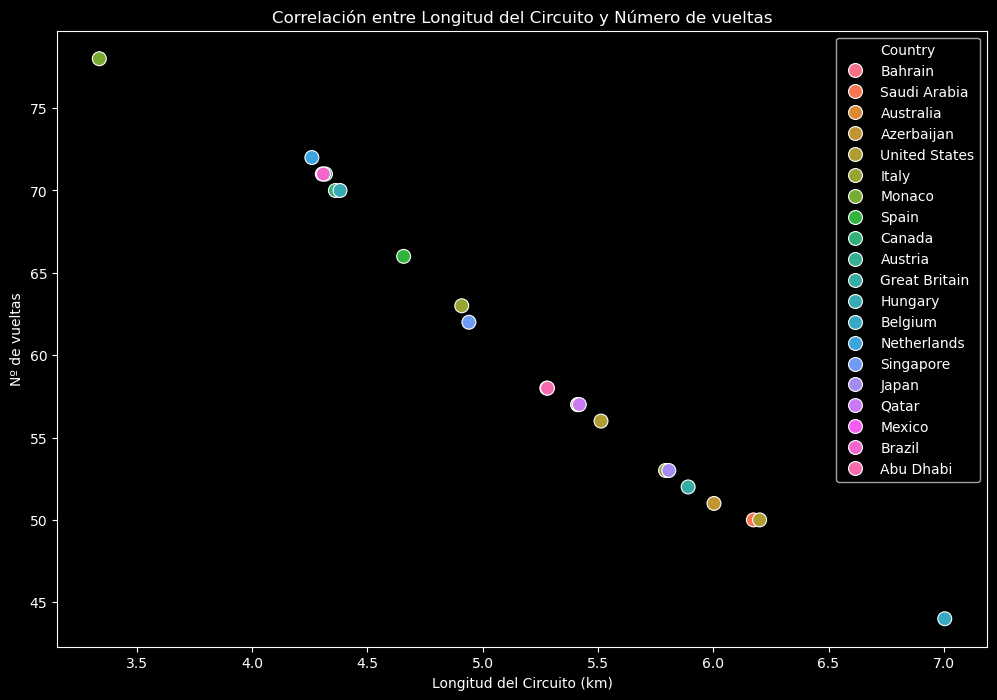

In [42]:
# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))

# Usar estilo de fondo oscuro
plt.style.use('dark_background')

sns.scatterplot(
    data=calendario2023,
    x='Circuit Length(km)',
    y='Number of Laps',
    hue='Country',
    s=100
)

# Título y etiquetas
plt.title('Correlación entre Longitud del Circuito y Número de vueltas')
plt.xlabel('Longitud del Circuito (km)')
plt.ylabel('Nº de vueltas')

# Mostrar el gráfico
plt.show()

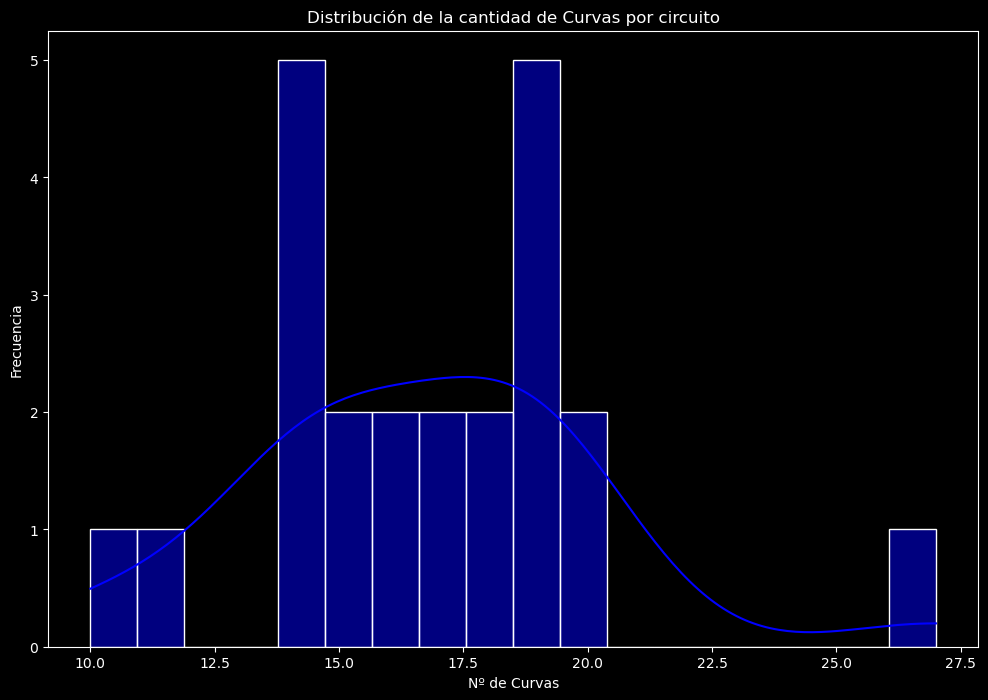

In [44]:
# Usar estilo de fondo oscuro
plt.style.use('dark_background')

plt.figure(figsize=(12, 8))
hist = sns.histplot(
    data=calendario2023,
    x='Turns',
    bins=18,
    kde=True,
    color='blue'
)
   
plt.title('Distribución de la cantidad de Curvas por circuito')
plt.xlabel('Nº de Curvas')
plt.ylabel('Frecuencia')

plt.show()

## Ubicación de los Grandes Premios de F1 - Temporada 2023

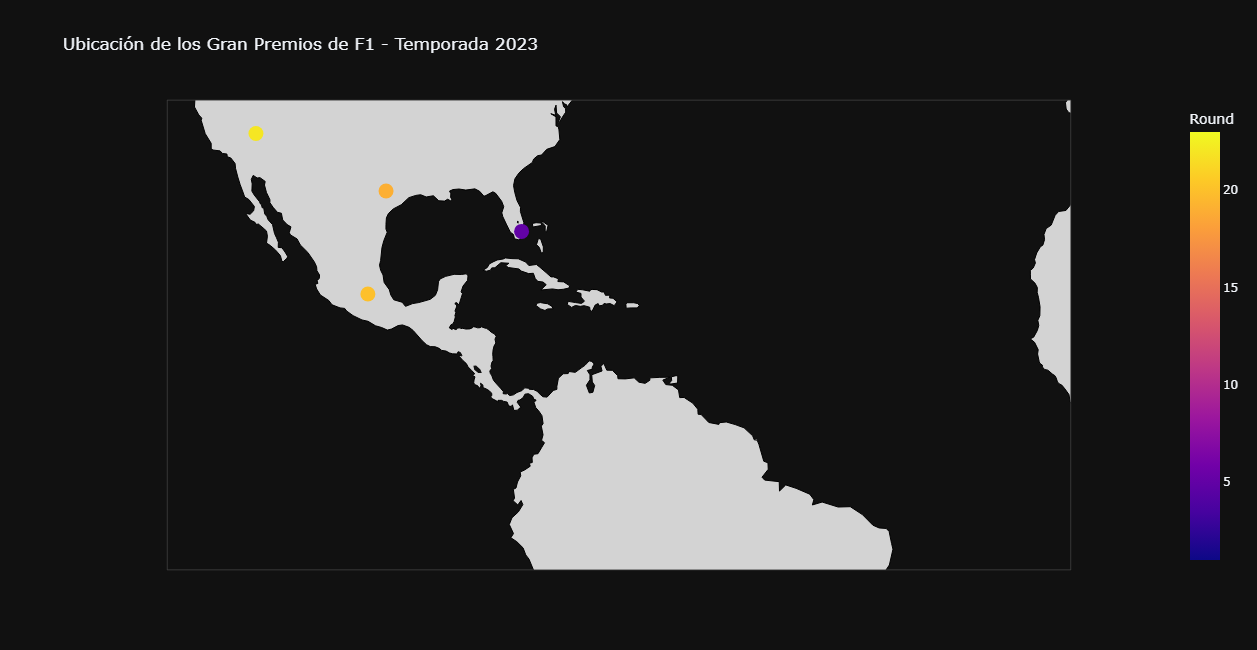

In [72]:
# Diccionario de coordenadas (ejemplo)
coords = {
    'Sakhir': {'lat': 26.0275, 'lon': 50.5106},
    'Jeddah': {'lat': 21.4225, 'lon': 39.1719},
    'Melbourne': {'lat': -37.8497, 'lon': 144.9680},
    'Baku': {'lat': 40.3777, 'lon': 49.8542},
    'Miami': {'lat': 25.9631, 'lon': -80.3033},
    'Imola': {'lat': 44.3725, 'lon': 11.7186},
    'Monaco': {'lat': 43.7347, 'lon': 7.4206},
    'Barcelona': {'lat': 41.5734, 'lon': 2.2611},
    'Montreal': {'lat': 45.5081, 'lon': -73.5532},
    'Spielberg': {'lat': 47.2197, 'lon': 14.7642},
    'Silverstone': {'lat': 52.0786, 'lon': -1.0169},
    'Budapest': {'lat': 47.2197, 'lon': 19.2307},
    'Spa-Francorchamps': {'lat': 50.4372, 'lon': 5.9715},
    'Zandvoort': {'lat': 52.3794, 'lon': 4.5411},
    'Monza': {'lat': 45.6200, 'lon': 9.2811},
    'Singapore': {'lat': 1.2914, 'lon': 103.8644},
    'Suzuka': {'lat': 34.8431, 'lon': 136.5411},
    'Lusail': {'lat': 25.4585, 'lon': 51.4480},
    'Austin': {'lat': 30.1740, 'lon': -97.6575},
    'Mexico City': {'lat': 19.4326, 'lon': -99.1332},
    'São Paulo': {'lat': -23.6920, 'lon': -46.6880},
    'Las Vegas': {'lat': 36.1699, 'lon': -115.1398},
    'Abu Dhabi': {'lat': 24.4539, 'lon': 54.3773}
}

# Añadir las coordenadas al DataFrame
calendario2023['Latitude'] = calendario2023['City'].map(lambda x: coords.get(x, {}).get('lat'))
calendario2023['Longitude'] = calendario2023['City'].map(lambda x: coords.get(x, {}).get('lon'))

# Ahora vamos a crear el mapa interactivo
fig = px.scatter_geo(calendario2023,
                     lat='Latitude', 
                     lon='Longitude', 
                     hover_name='GP Name',
                     hover_data=['City', 'Circuit Name', 'Round'],
                     color='Round', # Colorear por la ronda
                     projection="natural earth", # Proyección del mapa
                     title='Ubicación de los Gran Premios de F1 - Temporada 2023',
                     template="plotly_dark",
                     width=1000,
                     height=650)


# Ajustar el tamaño de los puntos
fig.update_traces(marker=dict(size=15))

# Configurar el estilo del mapa
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgray")

# Mostrar el gráfico
fig.show()


## Pilotos y equipos inscritos en la Temporada 2023

### Pilotos

In [82]:
pilotos2023

,Driver,Abbreviation,No,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position,Date of Birth,Place of Birth
0,Max Verstappen,VER,1,Red Bull Racing,Netherlands,98,2586.5,185,3,1(x54),1,30/09/1997,"Hasselt, Belgium"
1,Sergio Perez,PER,11,Red Bull Racing,Mexico,35,1486.0,258,0,1(x6),1,26/01/1990,"Guadalajara, Mexico"
2,Lewis Hamilton,HAM,44,Mercedes,United Kingdom,197,4639.5,332,7,1(x103),1,07/01/1985,"Stevenage, England"
3,Fernando Alonso,ALO,14,Aston Martin,Spain,106,2267.0,380,2,1(x32),1,29/07/1981,"Oviedo, Spain"
4,Charles Leclerc,LEC,16,Ferrari,Monaco,30,1074.0,125,0,1(x5),1,16/10/1997,"Monte Carlo, Monaco"
5,Lando Norris,NOR,4,McLaren,United Kingdom,13,633.0,104,0,2(x7),1,13/11/1999,"Bristol, England"
6,Carlos Sainz,SAI,55,Ferrari,Sapin,18,982.5,185,0,1(x2),1,01/09/1994,"Madrid, Spain"
7,George Russell,RUS,63,Mercedes,United Kingdom,11,469.0,104,0,1(x1),1,15/02/1998,"King's Lynn, England"
8,Oscar Piastri,PIA,81,McLaren,Australia,2,97.0,22,0,2(x1),2,06/04/2001,"Melbourne, Victoria"
9,Lance Stroll,STR,18,Aston Martin,Canada,3,268.0,143,0,3(x3),1,29/10/1998,"Montreal, Canada"


### Equipos

In [84]:
equipos2023

,Team,Full Team Name,Base,Team Chief,Technical Chief,Chassis,Power Unit,First Team Entry,World Championships,Highest Race Finish,Pole Positions,Fastest Laps
0,Red Bull Racing,Oracle Red Bull Racing,"Milton Keynes, United Kingdom",Christain Horner,Pierre Waché,RB19,Honda RBPT,1997,6,1(x113),95,95
1,Mercedes,Mercedes-AMG Petronas F1 Team,"Brackley, United Kingdom",Toto Wolff,James Allison,W14,Mercedes,1970,8,1(x116),129,96
2,Ferrari,Scuderia Ferrari,"Maranello, Italy",Frédéric Vasseur,Enrico Cardile / Enrico Gualtieri,SF-23,Ferrari,1950,16,1(x244),249,259
3,McLaren,McLaren Formula 1 Team,"Woking, United Kingdom",Andrea Stella,Peter Prodromou / Neil Houldey,MCL60,Mercedes,1966,8,1(x183),156,165
4,Aston Martin,Aston Martin Aramco Cognizant F1 Team,"Silverstone, United Kingdom",Mike Krack,Dan Fallows,AMR23,Mercedes,2018,0,1(x1),1,1
5,Alpine,BWT Alpine F1 Team,"Enstone, United Kingdom",Bruno Famin,Matt Harman,A523,Renault,1986,2,1(x21),20,15
6,Williams,Williams Racing,"Grove, United Kingdom",James Vowles,Pat Fry,FW45,Mercedes,1978,9,1(x114),128,133
7,AlphaTauri,Scuderia AlphaTauri,"Faenza, Italy",Franz Tost,Jody Egginton,AT04,Honda RBPT,1985,0,1(x2),1,3
8,Alfa Romeo,Alfa Romeo F1 Team Stake,"Hinwil, Switzerland",Alessandro Alunni Bravi,James Key,C43,Ferrari,1993,0,1(x1),1,7
9,Haas F1 Team,MoneyGram Haas F1 Team,"Kannapolis, United States",Guenther Steiner,Simone Resta,VF-23,Ferrari,2016,0,4(x1),1,2


## GPs Destacados de 2023

### Grand Prix de Monaco 2023 - Circuito de Mónaco, Montecarlo

In [74]:
ResultadosMonaco = resultadosCarreras_2023[resultadosCarreras_2023['Track'] == 'Monaco'].set_index('Position').drop('Track', axis = 1) 
ResultadosMonaco

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,78,1:48:51.980,25,No,1:16.604
2,14,Fernando Alonso,Aston Martin Aramco Mercedes,2,78,+27.921,18,No,1:16.674
3,31,Esteban Ocon,Alpine Renault,3,78,+36.990,15,No,1:16.528
4,44,Lewis Hamilton,Mercedes,5,78,+39.062,13,Yes,1:15.650
5,63,George Russell,Mercedes,8,78,+56.284,10,No,1:16.798
6,16,Charles Leclerc,Ferrari,6,78,+61.890,8,No,1:15.773
7,10,Pierre Gasly,Alpine Renault,7,78,+62.362,6,No,1:15.831
8,55,Carlos Sainz,Ferrari,4,78,+63.391,4,No,1:16.449
9,4,Lando Norris,McLaren Mercedes,10,77,+1 lap,2,No,1:17.844


### Gran Premio de los Países Bajos 2023 - Circuito de Zandvoort

In [77]:
ResultadosHolanda = resultadosCarreras_2023[resultadosCarreras_2023['Track'] == 'Netherlands'].set_index('Position').drop('Track', axis = 1)
ResultadosHolanda

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,72,2:24:04.411,25,No,1:13.889
2,14,Fernando Alonso,Aston Martin Aramco Mercedes,5,72,+3.744,19,Yes,1:13.837
3,10,Pierre Gasly,Alpine Renault,12,72,+7.058,15,No,1:14.441
4,11,Sergio Perez,Red Bull Racing Honda RBPT,7,72,+10.068,12,No,1:14.231
5,55,Carlos Sainz,Ferrari,6,72,+12.541,10,No,1:14.934
6,44,Lewis Hamilton,Mercedes,13,72,+13.209,8,No,1:13.904
7,4,Lando Norris,McLaren Mercedes,2,72,+13.232,6,No,1:14.390
8,23,Alexander Albon,Williams Mercedes,4,72,+15.155,4,No,1:14.468
9,81,Oscar Piastri,McLaren Mercedes,8,72,+16.580,2,No,1:14.299


### Gran Premio de Singapur 2023 - Circuito Urbano de Marina Bay

In [80]:
ResultadosSingapur = resultadosCarreras_2023[resultadosCarreras_2023['Track'] == 'Singapore'].set_index('Position').drop('Track', axis = 1)
ResultadosSingapur

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,55,Carlos Sainz,Ferrari,1,62,1:46:37.418,25,No,1:37.666
2,4,Lando Norris,McLaren Mercedes,4,62,+0.812,18,No,1:38.046
3,44,Lewis Hamilton,Mercedes,5,62,+1.269,16,Yes,1:35.867
4,16,Charles Leclerc,Ferrari,3,62,+21.177,12,No,1:38.275
5,1,Max Verstappen,Red Bull Racing Honda RBPT,11,62,+21.441,10,No,1:36.575
6,10,Pierre Gasly,Alpine Renault,12,62,+38.441,8,No,1:38.277
7,81,Oscar Piastri,McLaren Mercedes,17,62,+41.479,6,No,1:38.492
8,11,Sergio Perez,Red Bull Racing Honda RBPT,13,62,+54.534,4,No,1:37.108
9,40,Liam Lawson,AlphaTauri Honda RBPT,10,62,+65.918,2,No,1:39.028


## Clasificación del Mundial de Pilotos - 2023

In [87]:
circuitos = resultadosCarreras_2023['Track'].unique()
circuitosSprint = resultadosSprint_2023['Track'].unique()

In [89]:
puntosCarreras = resultadosCarreras_2023.groupby(['Driver', 'Team'])['Points'].sum().sort_values(ascending=False)
puntosSprint = resultadosSprint_2023.groupby(['Driver'])['Points'].sum().sort_values(ascending=False)
for piloto in resultadosCarreras_2023['Driver'].unique():
    if piloto not in resultadosSprint_2023['Driver'].unique():
        puntosSprint.loc[piloto] = 0
Clasificacion_Pilotos = (puntosCarreras + puntosSprint).fillna(0).sort_values(ascending=False)
Clasificacion_Pilotos = pd.DataFrame(Clasificacion_Pilotos).reset_index()
Clasificacion_Pilotos['POS'] = range(1,23)
Clasificacion_Pilotos['Points'] = Clasificacion_Pilotos['Points'].astype(int)
Clasificacion_Pilotos.set_index('POS', inplace=True)
Clasificacion_Pilotos

,Driver,Team,Points
POS,,,
1,Max Verstappen,Red Bull Racing Honda RBPT,575
2,Sergio Perez,Red Bull Racing Honda RBPT,285
3,Lewis Hamilton,Mercedes,234
4,Fernando Alonso,Aston Martin Aramco Mercedes,206
5,Charles Leclerc,Ferrari,206
6,Lando Norris,McLaren Mercedes,205
7,Carlos Sainz,Ferrari,200
8,George Russell,Mercedes,175
9,Oscar Piastri,McLaren Mercedes,97


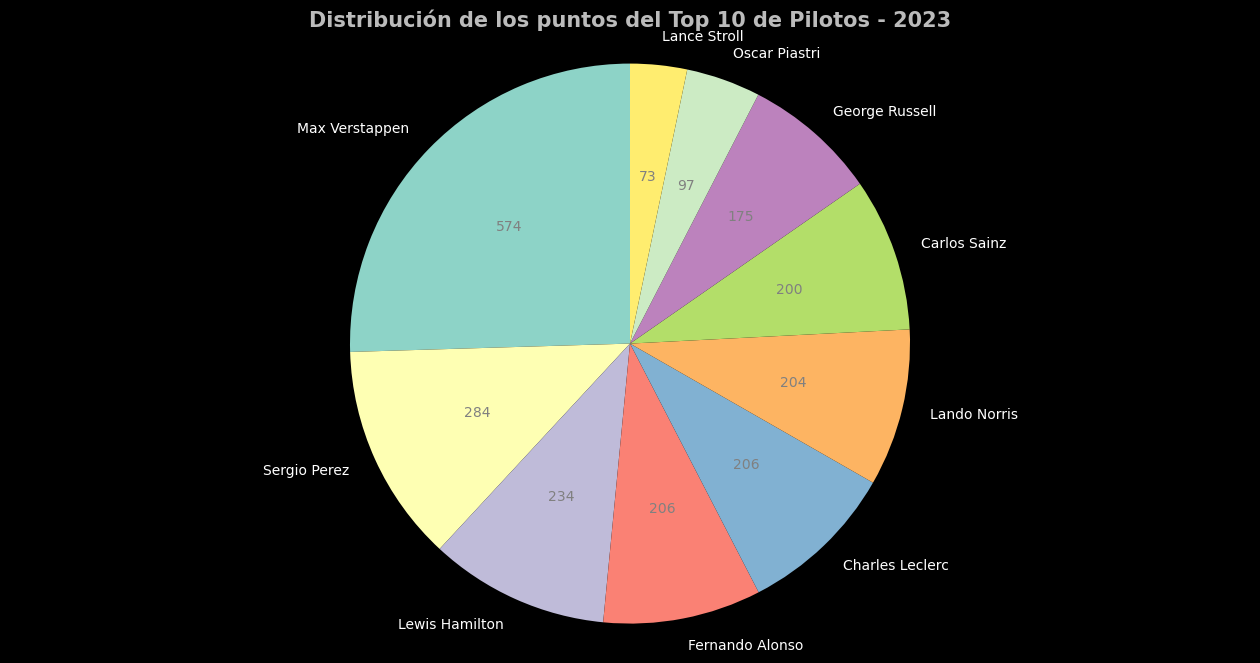

In [91]:
# Seleccionar los 10 primeros pilotos según sus puntos
top_10 = Clasificacion_Pilotos.head(10)

#Crear el gráfico de tarta (pie chart) con los puntos de los 10 primeros pilotos
plt.figure(figsize=(16, 8))

bars = plt.pie(top_10['Points'], labels=top_10['Driver'], autopct=lambda p: f'{int(p * top_10["Points"].sum() / 100)}', startangle=90,
        textprops={'color': 'gray'})

# Cambiar el color del texto de los nombres de pilotos a blanco
for i, bar in enumerate(bars[1]):  # bars[1] son los nombres de pilotos
    bar.set_color('white')  # Cambiamos el color de los mismos a blanco

# Título del gráfico
plt.title('Distribución de los puntos del Top 10 de Pilotos - 2023', 
          fontsize=15, 
          fontweight='bold',
          color='#bbbbbb')

# Mostrar el gráfico
plt.axis('equal')  # Para asegurar que el gráfico sea circular
plt.show()

### H2H Alonso vs Hamilton - Lucha por el 3º puesto

In [94]:
#plt.style.use('seaborn')
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '#15151d'
plt.rcParams['figure.facecolor'] = '#15151d'
plt.rcParams['grid.color'] = '#444444'

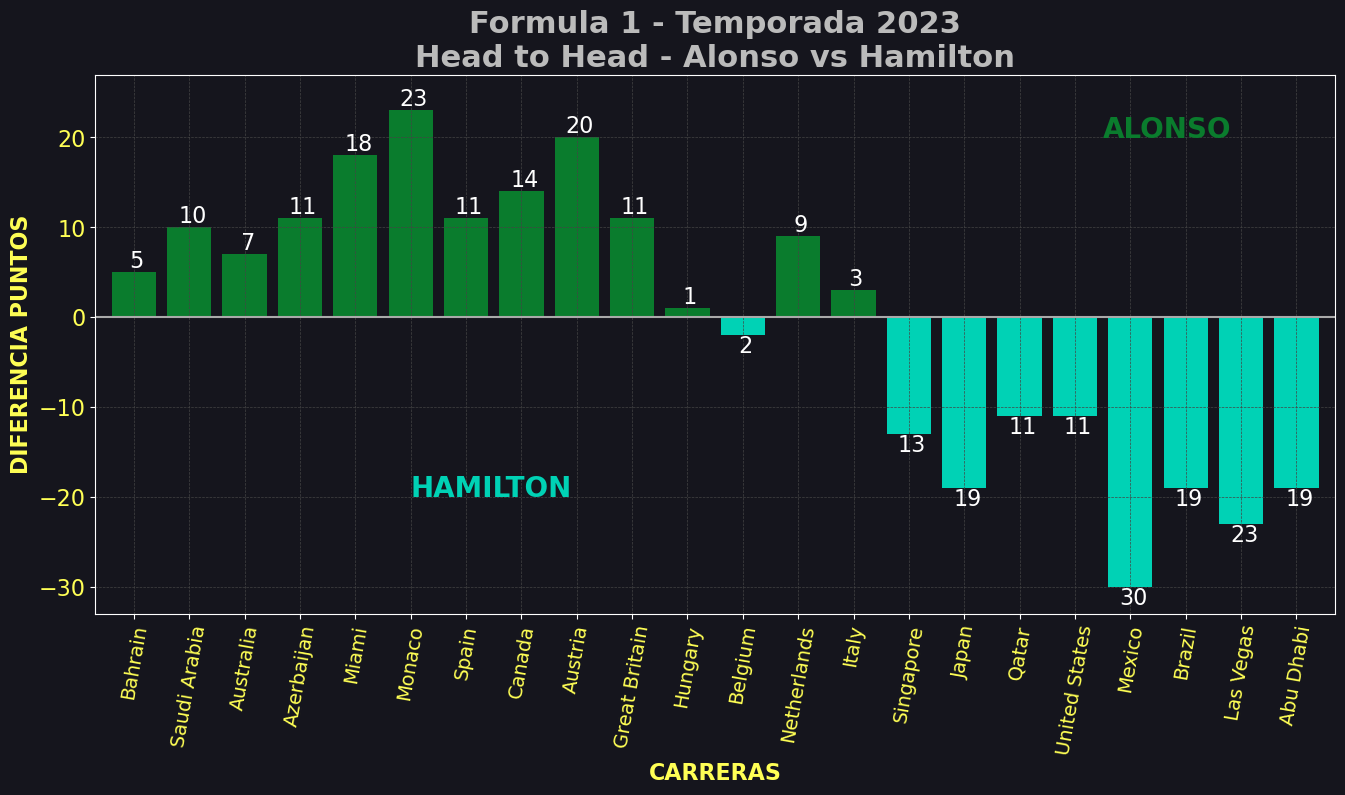

In [96]:
aloPts = resultadosCarreras_2023[resultadosCarreras_2023['Driver'] == 'Fernando Alonso']['Points'].values
#aloPts[9] += 3;  aloPts[13] += 2;  aloPts[18] += 2
hamPts = resultadosCarreras_2023[resultadosCarreras_2023['Driver'] == 'Lewis Hamilton']['Points'].values
#hamPts[9] += 2
pointsGap = np.cumsum(aloPts) - np.cumsum(hamPts)
c = []
for i in range(len(pointsGap)):
    if pointsGap[i] >= 0:   c.append('#0a7c2d')
    else:    c.append('#00d2b5')
plt.figure(figsize=(16,7))
plt.axis([-0.7, 21.7, min(pointsGap)-3, max(pointsGap)+4])
plt.bar(circuitos, pointsGap, color=c)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
for i in range(len(pointsGap)):
    if pointsGap[i] >= 0:   vsh = 0.5
    else:   vsh = -2
    plt.text(i-0.2, pointsGap[i]+vsh, "{:2}".format(int(abs(pointsGap[i]))), fontsize=16)
plt.axhline(0, color='#aaaaaa')
plt.text(17.5, 20, "ALONSO", color="#0a7c2d", fontsize=20, fontweight='bold')
plt.text(5, -20, "HAMILTON", color="#00d2b5", fontsize=20, fontweight='bold')
plt.title("Formula 1 - Temporada 2023\nHead to Head - Alonso vs Hamilton", color='#bbbbbb', 
          fontsize=22, fontweight='bold')
plt.xlabel('CARRERAS', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(range(0,len(circuitos)), circuitos, fontsize=14, color='#ffff55', rotation=80)
plt.ylabel('DIFERENCIA PUNTOS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=16, color='#ffff55')
plt.show()

## Clasificación del Mundial de Constructores - 2023

In [98]:
def asignar_color(val_type, values):
    cl = []
    for val in values:
        if val_type == 'drivers':  abbr = val.split()[1].upper()[0:3]
        elif val_type == 'teams':  abbr = val[0:4].upper()
        if abbr in ['ALFA','BOT','ZHO']:           cl.append('#900000')
        elif abbr in ['HAAS','HUL','MAG']:         cl.append('#ffffff')
        elif abbr in ['ASTO','STR','ALO']:   cl.append('#006f62')
        elif abbr in ['WILL','ALB','SAR']:    cl.append('#0072ff')
        elif abbr in ['ALPH','LAW','TSU','RIC', 'DE']:   cl.append('#2b5962')
        elif abbr in ['MCLA','PIA','NOR']:         cl.append('#ff8700')
        elif abbr in ['RED ','VER','PER']:         cl.append('#0600f0')
        elif abbr in ['FERR','LEC','SAI']:         cl.append('#cb0000')
        elif abbr in ['MERC','HAM','RUS']:         cl.append('#00d2bd')
        elif abbr in ['ALPI','GAS','OCO']:         cl.append('#0090ff')
    return cl

In [100]:
puntosCarreras_Equipo = resultadosCarreras_2023.groupby('Team')['Points'].sum().sort_values(ascending=False)
puntosSprint_Equipo = resultadosSprint_2023.groupby('Team')['Points'].sum().sort_values(ascending=False)
Clasificacion_Constructores = (puntosCarreras_Equipo + puntosSprint_Equipo).fillna(0).sort_values(ascending=False)
Clasificacion_Constructores = pd.DataFrame(Clasificacion_Constructores).reset_index()
Clasificacion_Constructores['POS'] = range(1,12)
Clasificacion_Constructores.set_index('POS', inplace=True)
#Eliminamos el equipo 'Aston Martib Aramco Mercedes', ya que realmente no existe y se genera debido a un error de sintaxis
Clasificacion_Constructores = Clasificacion_Constructores.drop(
    Clasificacion_Constructores[Clasificacion_Constructores['Team'] == 'Aston Martib Aramco Mercedes'].index
)
Clasificacion_Constructores

,Team,Points
POS,,
1,Red Bull Racing Honda RBPT,860.0
2,Mercedes,409.0
3,Ferrari,406.0
4,McLaren Mercedes,302.0
5,Aston Martin Aramco Mercedes,280.0
6,Alpine Renault,120.0
7,Williams Mercedes,28.0
8,AlphaTauri Honda RBPT,25.0
9,Alfa Romeo Ferrari,16.0


In [102]:
nombresEquipos = Clasificacion_Constructores['Team'].unique()
puntosEquipo = {};   puntosEquipoSprint = {}
trackTeamPtsMerged = resultadosCarreras_2023.groupby(['Track','Team'])['Points'].sum()
trackTeamPtsSprintMerged = resultadosSprint_2023.groupby(['Track','Team'])['Points'].sum()
for equipo in nombresEquipos:
    puntosEquipo[equipo] = trackTeamPtsMerged[slice(None), equipo].reindex(circuitos).values
    puntosEquipoSprint[equipo] = trackTeamPtsSprintMerged[slice(None), equipo].reindex(circuitosSprint).values
sp = [3, 10, 20]
for equipo in nombresEquipos:
    for i in range(len(sp)):
        puntosEquipo[equipo][sp[i]] = puntosEquipo[equipo][sp[i]] + puntosEquipoSprint[equipo][i]

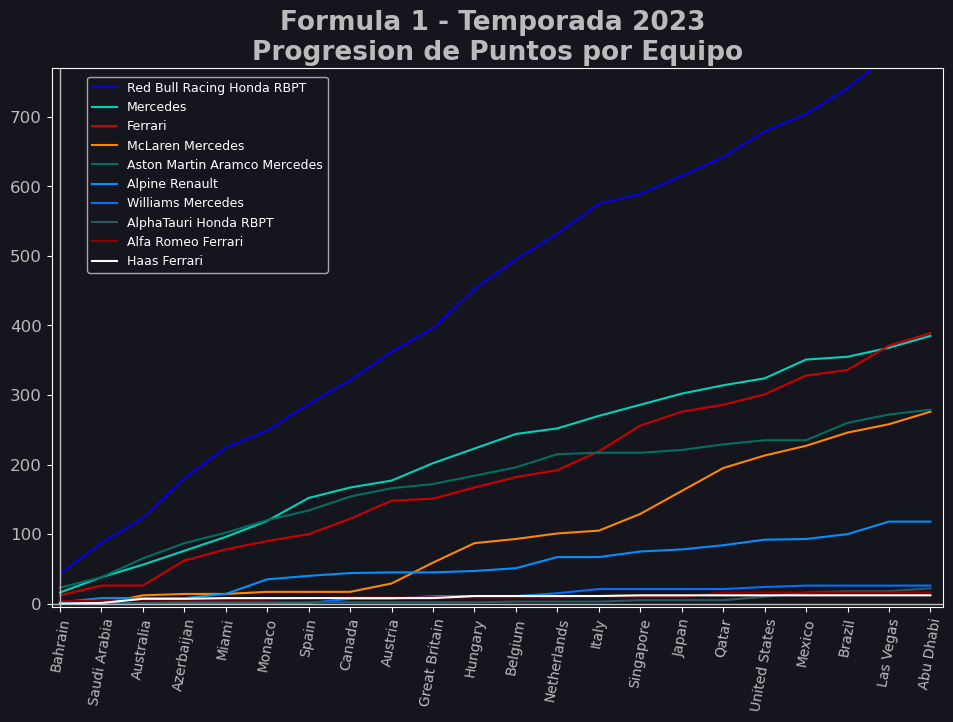

In [104]:
c = asignar_color('teams', nombresEquipos)
plt.figure(figsize=(11.5,7))
plt.axis([-0.2,21.3,-5,770])
for i in range(10):
    plt.plot(puntosEquipo[nombresEquipos[i]].cumsum(), color=c[i], label=nombresEquipos[i])
plt.title('Formula 1 - Temporada 2023 \nProgresion de Puntos por Equipo', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,len(circuitos)), circuitos, rotation=80, fontsize=10, color='#bbbbbb')
plt.yticks(fontsize=12, color='#bbbbbb')
plt.axvline(0, linewidth=1, color='#bbbbbb')
plt.axhline(0, linewidth=1, color='#bbbbbb')
plt.legend(loc=(0.04,0.62), fontsize=9)
plt.show()

## Temporada 2023 - Análisis de Clasificaciones

In [107]:
resultadosQuali_2023.head(10)

,Track,Position,No,Driver,Team,Q1,Q2,Q3,Laps
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1:31.295,1:30.503,1:29.708,15
1,Bahrain,2,11,Sergio Perez,Red Bull Racing Honda RBPT,1:31.479,1:30.746,1:29.846,15
2,Bahrain,3,16,Charles Leclerc,Ferrari,1:31.094,1:30.282,1:30.000,17
3,Bahrain,4,55,Carlos Sainz,Ferrari,1:30.993,1:30.515,1:30.154,18
4,Bahrain,5,14,Fernando Alonso,Aston Martin Aramco Mercedes,1:31.158,1:30.645,1:30.336,15
5,Bahrain,6,63,George Russell,Mercedes,1:31.057,1:30.507,1:30.340,15
6,Bahrain,7,44,Lewis Hamilton,Mercedes,1:31.543,1:30.513,1:30.384,15
7,Bahrain,8,18,Lance Stroll,Aston Martin Aramco Mercedes,1:31.184,1:31.127,1:30.836,18
8,Bahrain,9,31,Esteban Ocon,Alpine Renault,1:31.508,1:30.914,1:30.984,15
9,Bahrain,10,27,Nico Hulkenberg,Haas Ferrari,1:31.204,1:30.809,DNF,17


### % de Poles por Piloto

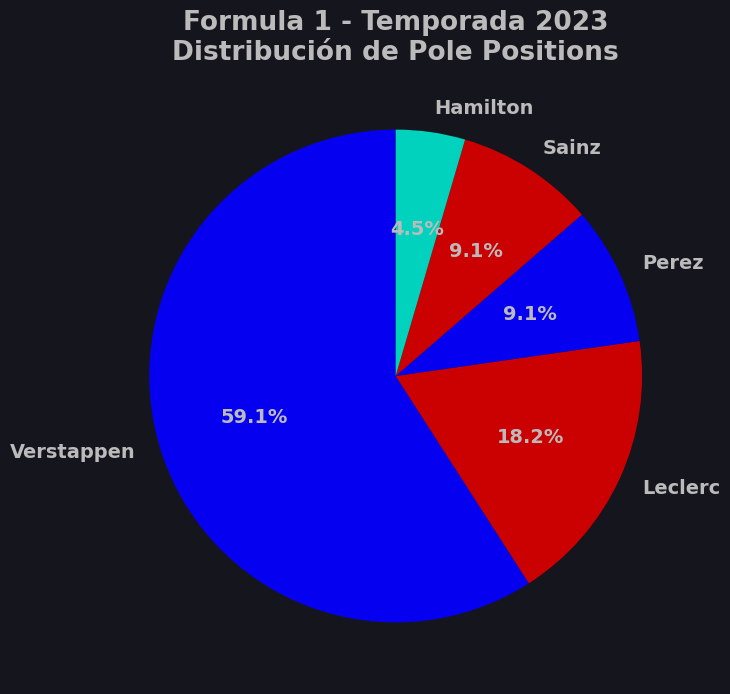

In [110]:
# Datos: polePosition ya está calculado
polePosition = resultadosQuali_2023[resultadosQuali_2023['Position'] == '1']['Driver'].value_counts()

# Asignar colores usando la función 'asignar_color'
c = asignar_color('drivers', polePosition.index)

# Crear el gráfico de tarta (pie chart)
plt.figure(figsize=(8, 8))

# Graficar el gráfico de tarta
plt.pie(polePosition, labels=[piloto.split()[1] for piloto in polePosition.index], 
        colors=c, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14, 'fontweight': 'bold', 'color': '#bbbbbb'})

# Título
plt.title('Formula 1 - Temporada 2023\nDistribución de Pole Positions', fontsize=19, fontweight='bold', color='#bbbbbb')

# Mostrar el gráfico
plt.show()


### Nº de Apariciones en Q3

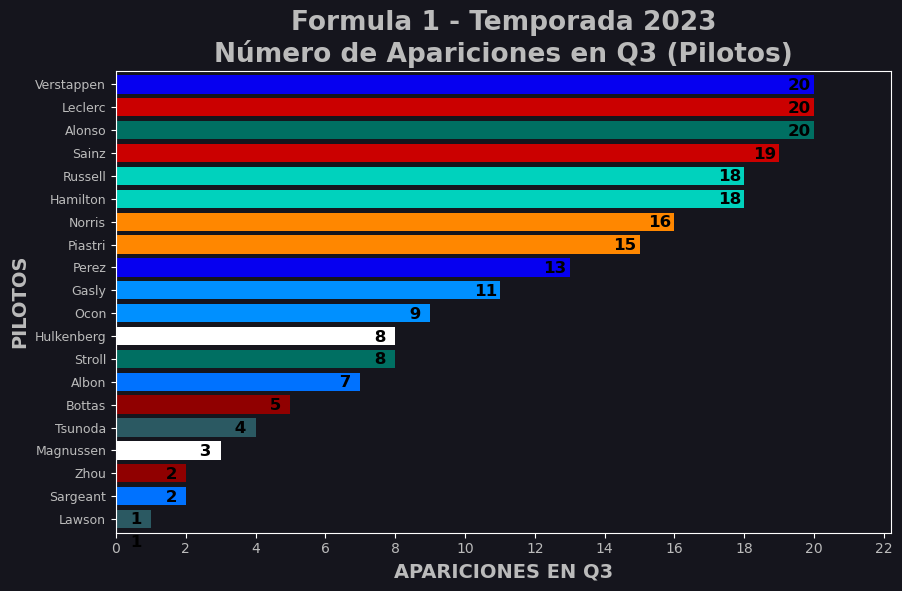

In [113]:
qualiQ3 = resultadosQuali_2023[resultadosQuali_2023['Position'].isin([str(i) for i in range(1,11)])] \
    ['Driver'].value_counts()

c = asignar_color('drivers', qualiQ3.index)
plt.figure(figsize=(10,6))

# Establecer los límites del gráfico
plt.axis([0,22.2,19.6,-0.6])

# Crear las barras horizontales
plt.barh([" ".join(driver.split()[1:]) for driver in qualiQ3.index], qualiQ3, color=c)

# Añadir el texto sobre las barras (número de apariciones en Q3)
for i in range(len(qualiQ3)):
    plt.text(qualiQ3.iloc[i]-0.75, i+0.24, "{:>2}".format(qualiQ3.iloc[i]), fontsize=12, fontweight='bold', color='k')

# Título y etiquetas
plt.title("Formula 1 - Temporada 2023\nNúmero de Apariciones en Q3 (Pilotos)", fontsize=19, 
          fontweight='bold', color='#bbbbbb')
plt.xlabel('APARICIONES EN Q3', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('PILOTOS', fontsize=14, fontweight='bold', color='#bbbbbb')

# Personalizar las etiquetas de los ejes
plt.xticks(range(0,23,2), range(0,23,2), color='#bbbbbb')
plt.yticks(fontsize=9, color='#bbbbbb')

# Añadir la línea vertical en el eje x
plt.axvline(0, color='#bbbbbb')

# Mostrar el gráfico
plt.show()
